<a href="https://colab.research.google.com/github/Shivam4681/DeepLearning/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import Files

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 2: Read The Dataset

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Shivam4681/DeepLearning/main/PowerPlant.csv'
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Step 3: Perform Basic Data Quality Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna()

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9563,False,False,False,False,False
9564,False,False,False,False,False
9565,False,False,False,False,False
9566,False,False,False,False,False


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

41

In [7]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [8]:
df = df.drop_duplicates(keep='first')
df.shape

(9527, 5)

## Seprate X And Y

In [9]:
x = df.drop(columns=['PE'])
y = df['PE']

In [10]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

## Step 4: Process X Using Pipeline

In [12]:
x.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')

In [15]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Applay Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [17]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [18]:
ytrain.head()

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
Name: PE, dtype: float64

In [19]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [20]:
ytest.head()

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
Name: PE, dtype: float64

In [21]:
xtrain.shape

(7621, 4)

In [22]:
xtest.shape

(1906, 4)

In [23]:
xtrain.shape[1]

4

## Step 5: Built The Neural Network

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [25]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))


In [26]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [27]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 4ms/step - loss: 203068.7031 - mae: 450.2690 - val_loss: 195536.7656 - val_mae: 441.7338
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 172668.5781 - mae: 414.0735 - val_loss: 139478.1094 - val_mae: 371.3475
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 99033.8906 - mae: 305.4533 - val_loss: 58838.8555 - val_mae: 228.1770
Epoch 4/60
239/239 [==============================] - 1s 3ms/step - loss: 37879.8984 - mae: 173.0389 - val_loss: 23292.5391 - val_mae: 130.2591
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 19845.0898 - mae: 120.6229 - val_loss: 16254.7832 - val_mae: 108.8548
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 14462.2764 - mae: 102.7060 - val_loss: 11886.5430 - val_mae: 92.9030
Epoch 7/60
239/239 [==============================] - 1s 5ms/step - loss: 10113.7061 - mae: 85.4778 - val_loss: 7920.5645 - val_mae: 

In [28]:
hist.history["loss"]

[203068.703125,
 172668.578125,
 99033.890625,
 37879.8984375,
 19845.08984375,
 14462.2763671875,
 10113.7060546875,
 6411.396484375,
 3645.149169921875,
 1906.2684326171875,
 995.7437744140625,
 577.4972534179688,
 386.39520263671875,
 289.39227294921875,
 232.16970825195312,
 191.97901916503906,
 160.10006713867188,
 132.6955108642578,
 108.26641082763672,
 88.04736328125,
 73.65605163574219,
 63.43243408203125,
 55.68552017211914,
 49.83710861206055,
 45.194480895996094,
 41.24992752075195,
 37.91844940185547,
 35.09345245361328,
 32.6452522277832,
 30.58894157409668,
 28.730892181396484,
 27.36469078063965,
 26.16007423400879,
 24.9492244720459,
 24.021930694580078,
 23.106670379638672,
 22.72173309326172,
 22.010807037353516,
 21.51582908630371,
 20.872785568237305,
 20.53261375427246,
 20.093246459960938,
 19.99565315246582,
 19.667095184326172,
 19.57437515258789,
 19.390975952148438,
 19.266496658325195,
 19.168638229370117,
 19.264808654785156,
 18.967674255371094,
 18.928384

In [29]:
hist.history['val_loss']

[195536.765625,
 139478.109375,
 58838.85546875,
 23292.5390625,
 16254.783203125,
 11886.54296875,
 7920.564453125,
 4720.53759765625,
 2525.29443359375,
 1297.0106201171875,
 705.48779296875,
 447.5208435058594,
 323.1659851074219,
 257.53155517578125,
 214.9575653076172,
 178.82632446289062,
 149.14622497558594,
 123.33020782470703,
 100.38619995117188,
 83.70270538330078,
 71.05427551269531,
 62.427337646484375,
 55.180145263671875,
 48.89434814453125,
 44.18803787231445,
 40.68607711791992,
 37.05888366699219,
 34.19082260131836,
 32.05500411987305,
 29.7629337310791,
 27.91718292236328,
 26.631118774414062,
 25.22916603088379,
 24.481863021850586,
 23.284299850463867,
 23.257734298706055,
 22.135927200317383,
 21.417613983154297,
 21.421968460083008,
 20.814992904663086,
 20.335529327392578,
 20.028284072875977,
 19.802276611328125,
 19.94029998779297,
 19.912378311157227,
 18.97930145263672,
 19.173038482666016,
 18.62723159790039,
 19.26952362060547,
 19.261425018310547,
 18.41

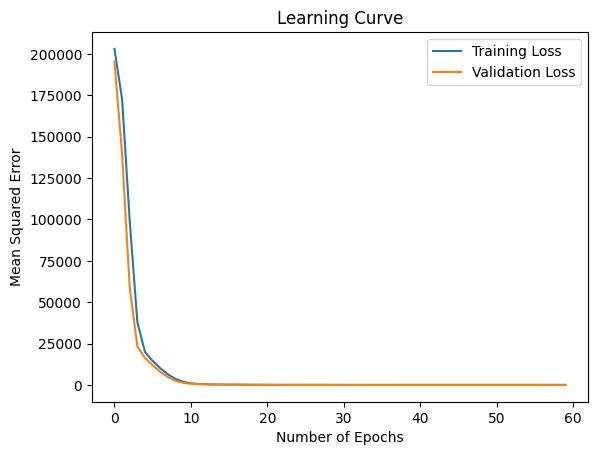

In [30]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [31]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 0s 2ms/step - loss: 18.3275 - mae: 3.3151


[18.32752799987793, 3.315107583999634]

In [32]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 17.9828 - mae: 3.3205


[17.982751846313477, 3.3204543590545654]

### Predict the result for train and test

In [34]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [35]:
ypred_train[0:5]

array([[451.1644 ],
       [480.15445],
       [469.44626],
       [433.98398],
       [467.55026]], dtype=float32)

In [36]:
ytrain.head()

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
Name: PE, dtype: float64

In [37]:
ypred_test[0:5]

array([[431.94226],
       [481.8975 ],
       [483.1121 ],
       [450.1092 ],
       [446.78384]], dtype=float32)

In [38]:
ytest.head()

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
Name: PE, dtype: float64

In [39]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9362354273463844

In [40]:
# R2 Score in test
r2_score(ytest, ypred_test)

0.94041296491336

#### Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [41]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [42]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [43]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [44]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 4ms/step


array([[444.41656],
       [439.10373],
       [431.71982],
       [438.65082],
       [471.935  ]], dtype=float32)

In [47]:
xnew["PowerOutput_pred"] = preds
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,444.416565
1,28.88,54.89,1007.16,46.60,439.103729
2,27.89,73.21,1001.32,85.88,431.719818
3,25.69,62.26,1011.38,74.08,438.650818
4,12.16,40.81,1025.79,70.97,471.934998
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.544830
96,11.78,39.96,1011.37,82.95,473.168610
97,5.62,41.38,1020.91,86.21,485.428497
98,24.96,74.99,1008.25,80.52,435.711212


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

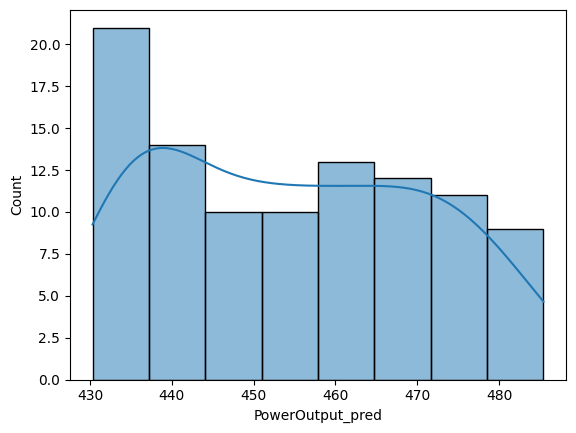

In [49]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [50]:
xnew.to_csv('Result.csv', index=False)